In [1]:
import os
from glob import glob

from astropy.io import fits
from astropy.table import Table, hstack

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from matplotlib.patches import Rectangle

plt.rcParams.update({
    'font.family'      :'serif',
    'font.size'        : 24,
    'font.serif'       :'Georgia',
    'axes.labelsize'   :'large',
    'mathtext.fontset' :'stix',
    'axes.linewidth'   :  1.5,
    'xtick.direction'  :'in',
    'ytick.direction'  :'in',
    'xtick.major.size' : 5,
    'ytick.major.size' : 5,
    'xtick.major.width': 1.2,
    'ytick.major.width': 1.2,
})

In [2]:
with fits.open('/data2/lsajkov/mpdg/data_products/predicted_catalogs/KiDS_SOM_predicted_match_COSMOS_31Jul24.fits') as cat:
    KiDS_COSMOS_comp = Table(cat[1].data)

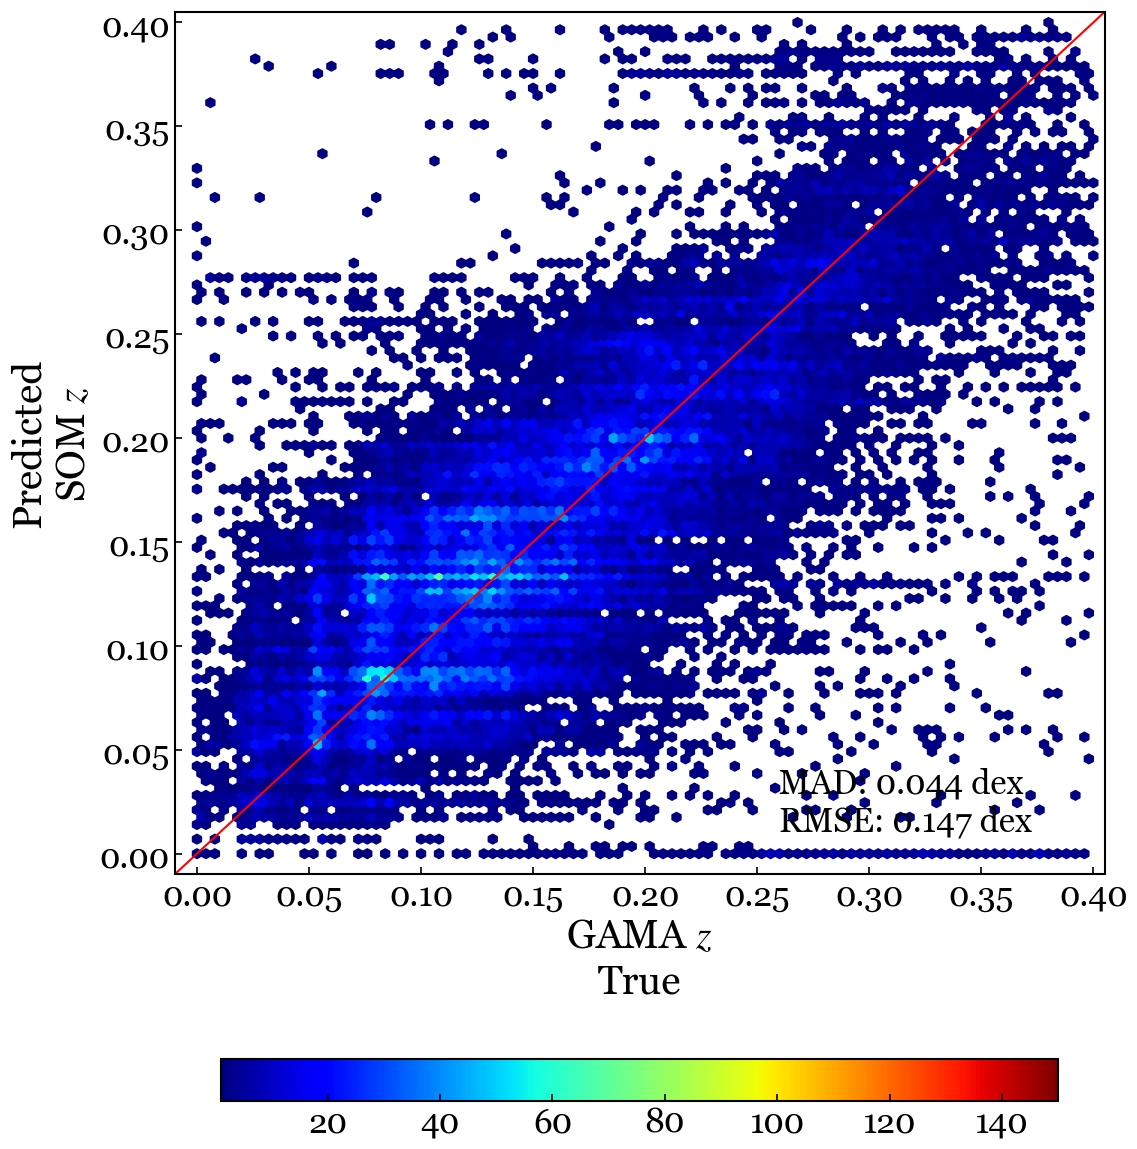

In [9]:
fig = plt.figure(figsize = (12, 16))

plot_cat = KiDS_COSMOS_comp[KiDS_COSMOS_comp['Z'] < 0.4]

ax_l = fig.add_subplot(1, 1, 1)

hb_l = ax_l.hexbin(plot_cat['Z'],
                   plot_cat['redshift_pred'],
                   mincnt = 1, cmap = 'jet',
                   vmin = 1, vmax = 150,
                   extent = [0, 0.4, 0, 0.4])

ax_l.axline([0.2, 0.2], slope = 1, color = 'red')
ax_l.set_xlim(-0.01, 0.405)
ax_l.set_ylim(-0.01, 0.405)
ax_l.set_xticks(np.arange(0, 0.45, 0.05))

ax_l.set_xlabel('GAMA $z$\nTrue')
ax_l.set_ylabel('Predicted\nSOM $z$')

z_MAD = np.mean(np.abs(plot_cat['Z'] - plot_cat['redshift_pred']))
z_RMSE = np.sqrt(np.mean((plot_cat['Z'] - plot_cat['redshift_pred']) ** 2))

ax_l.text(0.65, 0.05, f'MAD: {z_MAD:.3f} dex\nRMSE: {z_RMSE:.3f} dex',
          transform = ax_l.transAxes)


# ax_r = fig.add_subplot(1, 2, 2)


# hb_r = ax_r.hexbin(np.log10(labeling_data_outputs[:, 1]),
#                    predicted_values_labeling[:, 1],
#                    mincnt = 1, cmap = 'jet',
#                    vmin = 1, vmax = 150)

# ax_r.axline([10, 10], slope = 1, color = 'red')
# ax_r.set_xlim(7, 11.2)
# ax_r.set_ylim(7, 11.2)
# ax_r.set_xticks(np.arange(7, 11.5, 0.5))

# ax_r.set_xlabel('GAMA $\log_{10} (M_*/M_{\odot})$\nTrue')
# ax_r.set_ylabel('Predicted\nSOM $\log_{10} (M_*/M_{\odot})$')

# Mstar_MAD = np.nanmean(np.abs(np.log10(labeling_data_outputs[:, 1]) - predicted_values_labeling[:, 1]))
# Mstar_RMSE = np.sqrt(np.mean(np.log10(labeling_data_outputs[:, 1]) - predicted_values_labeling[:, 1]) ** 2)

# ax_r.text(0.65, 0.05, f'MAD: {Mstar_MAD:.3f} dex\nRMSE: {Mstar_RMSE:.3f} dex',
#           transform = ax_r.transAxes)

# fig.subplots_adjust(wspace = 0.25)

fig.colorbar(mappable = hb_l, location = 'bottom', ax = [ax_l], shrink = 0.9)